Author: Yang
Date: 04/22/2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
county_area = pd.read_csv(r"..\..\data\drought_monitor\county_area.csv")
county_area.head()
county_area.describe()

AREA            X            Y
count    3221.000000  3221.000000  3221.000000
mean     1117.229153   -91.637594    37.966028
std      3627.892230    13.310460     6.093899
min         1.998782  -163.971623    17.982748
25%       426.799022   -98.086007    34.354134
50%       617.989300   -89.944310    38.212272
75%       932.294519   -82.991492    41.694589
max    147805.089619   -65.287805    69.307273

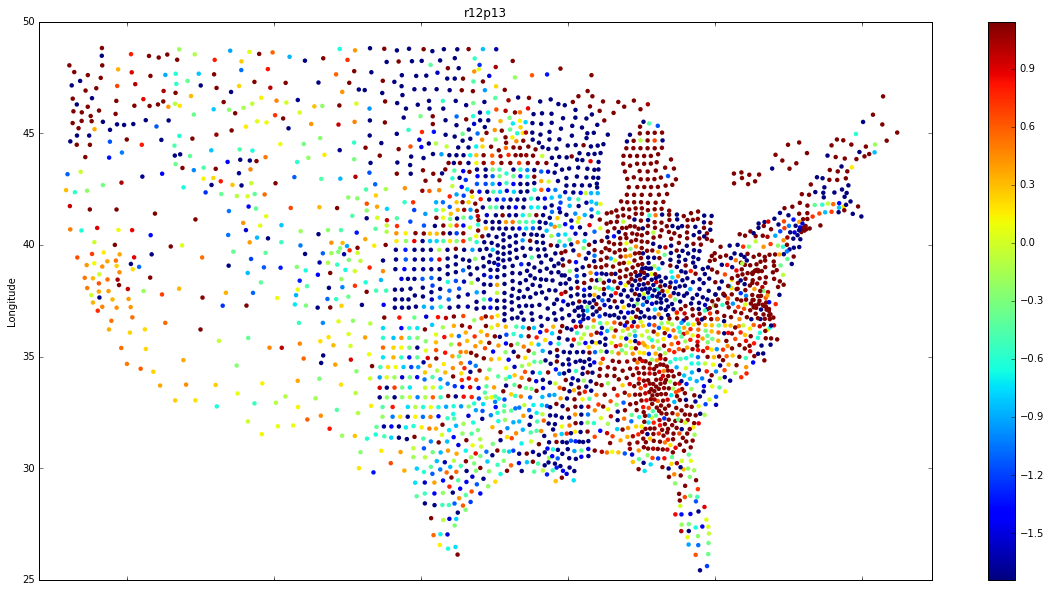

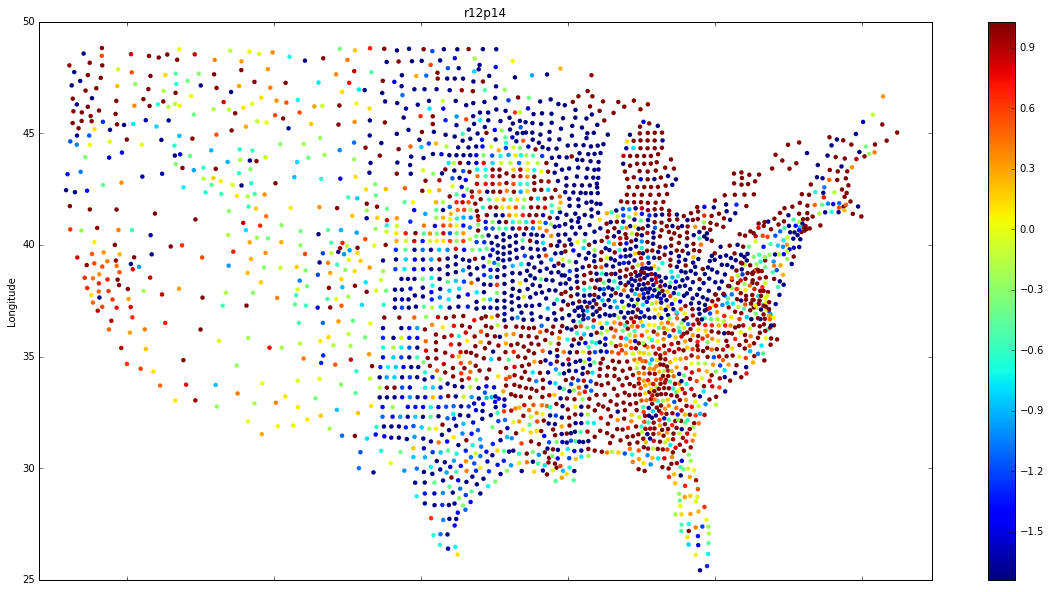

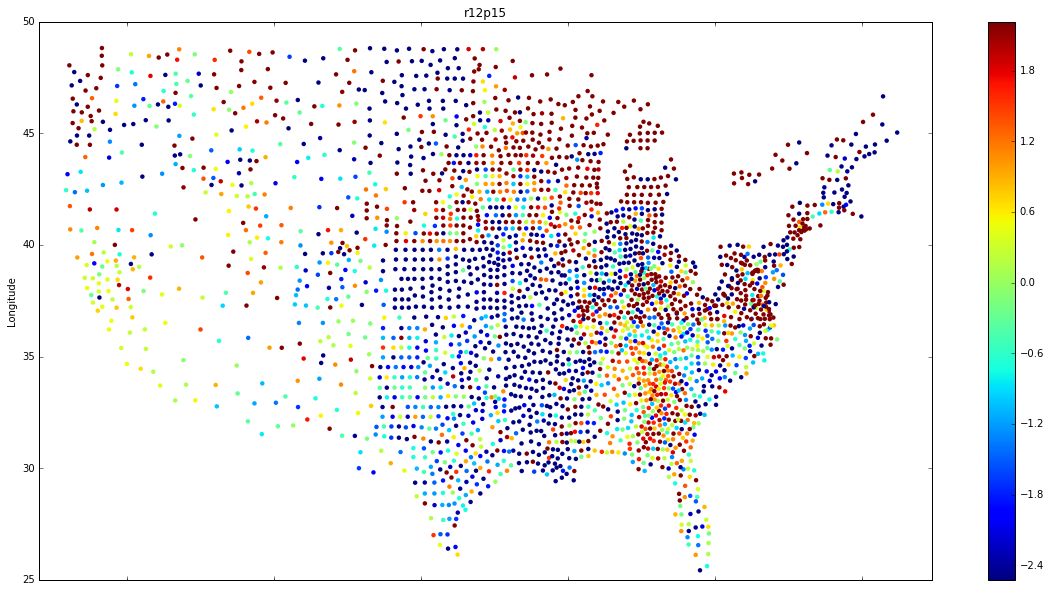

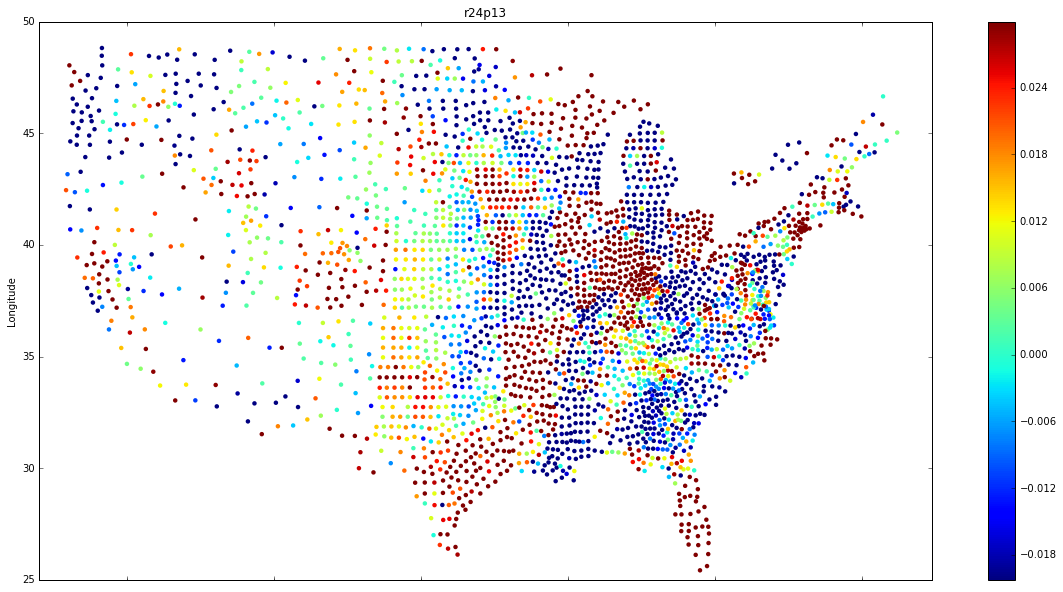

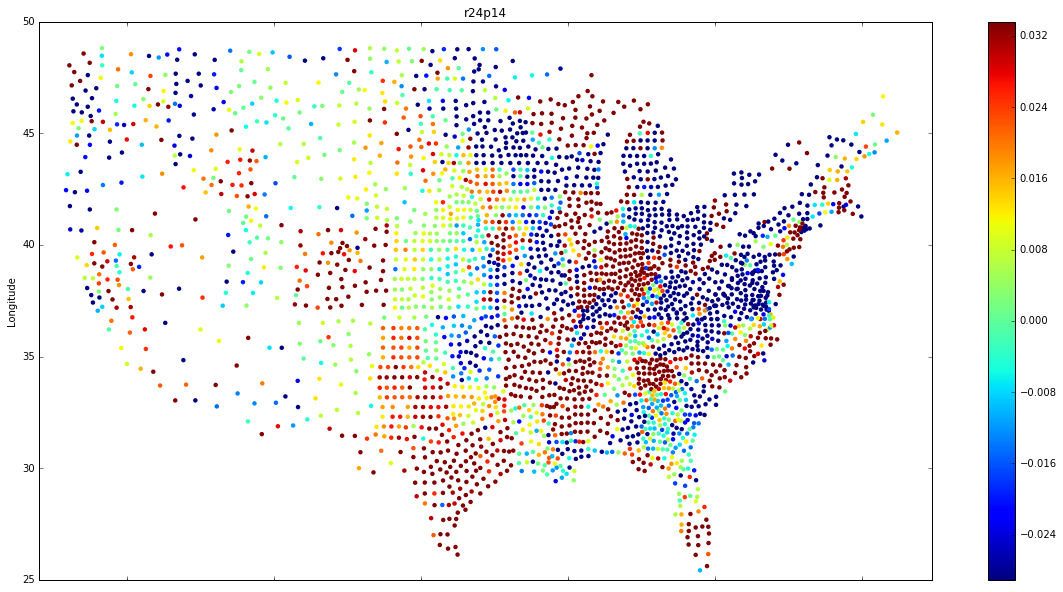

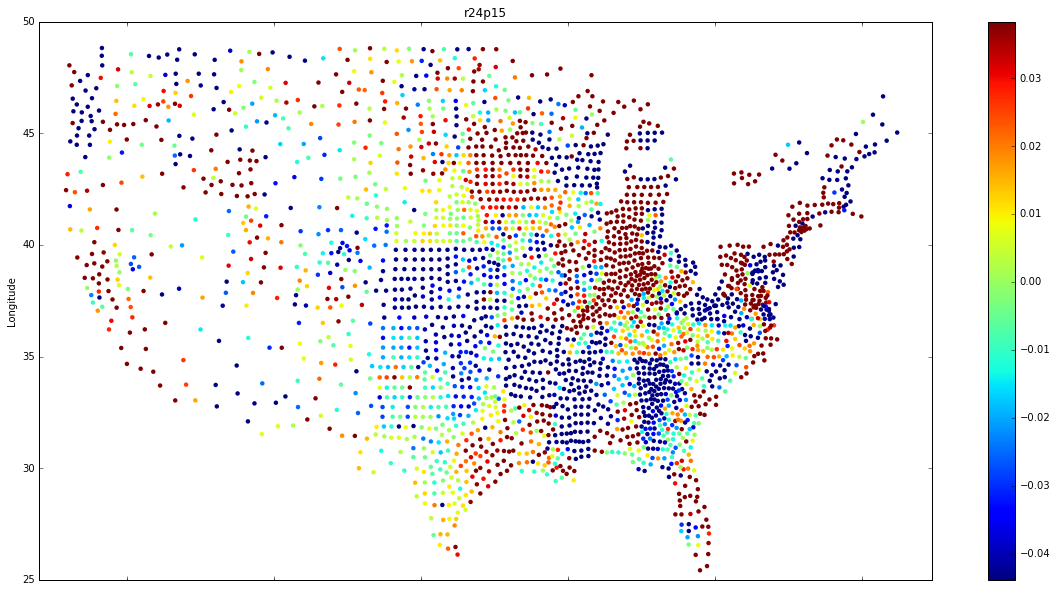

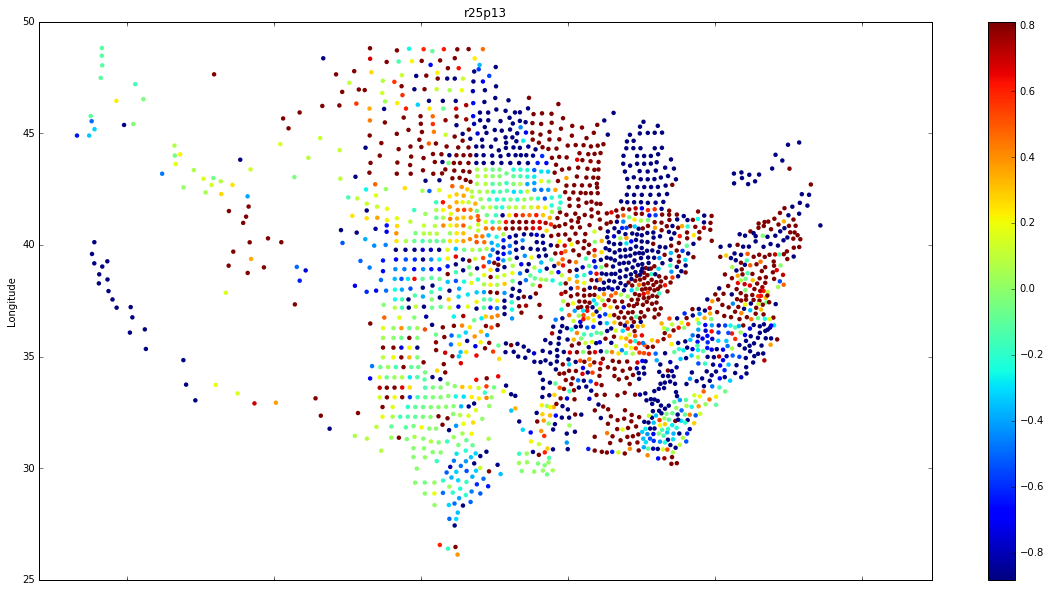

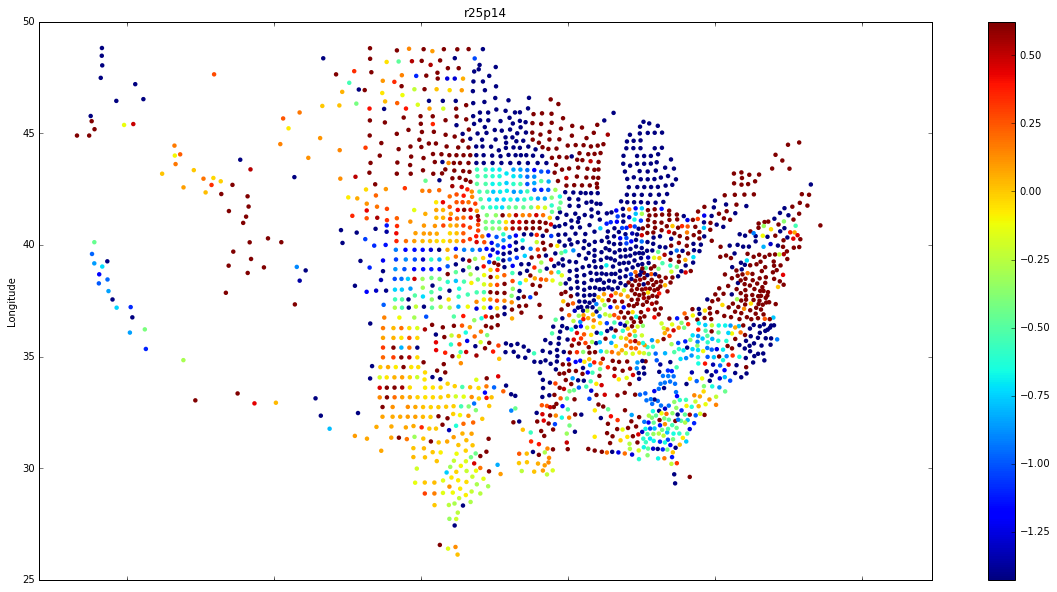

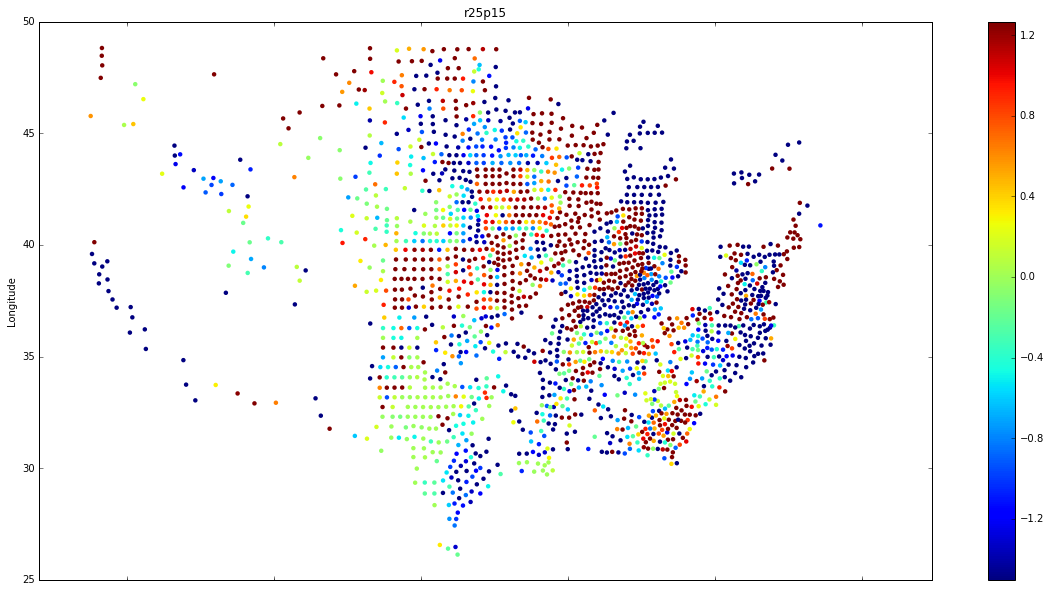

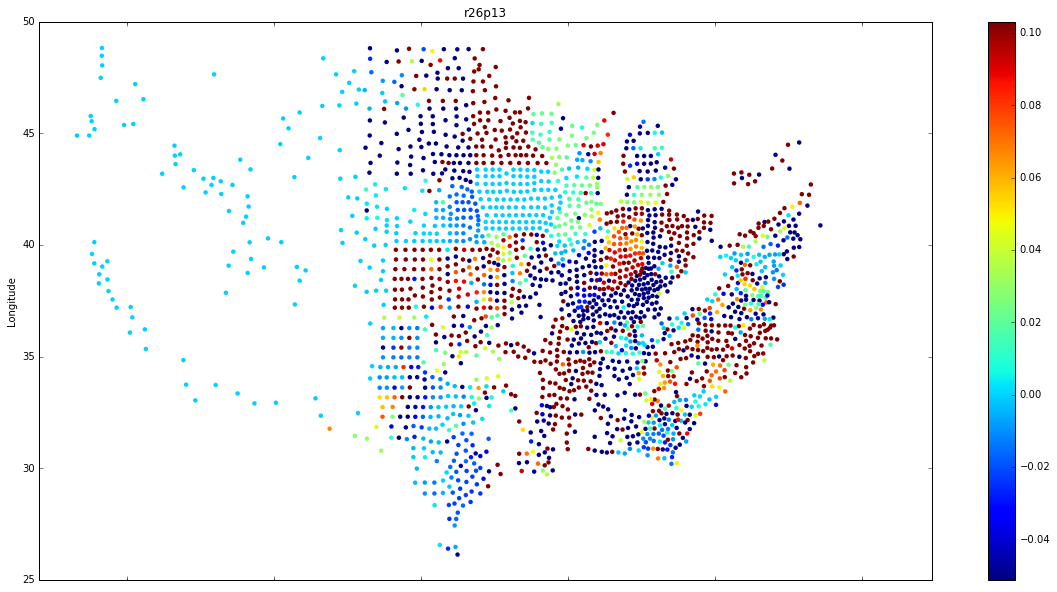

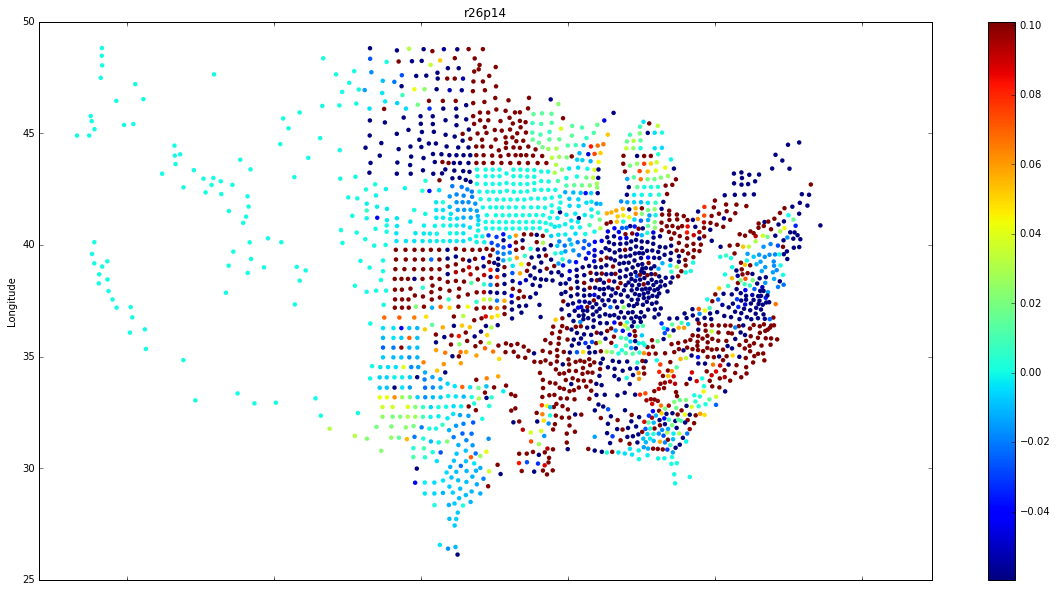

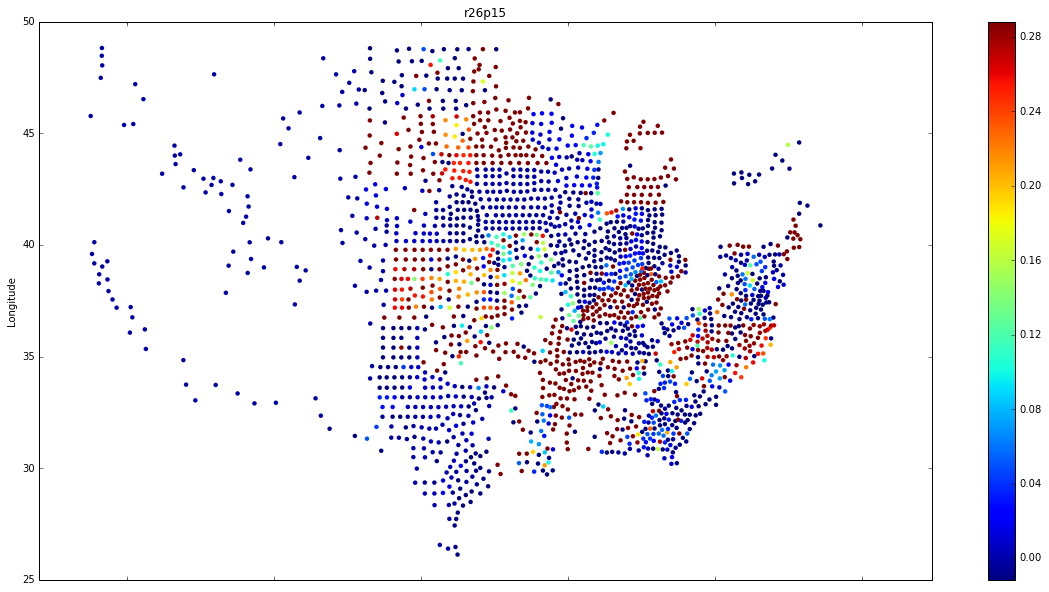

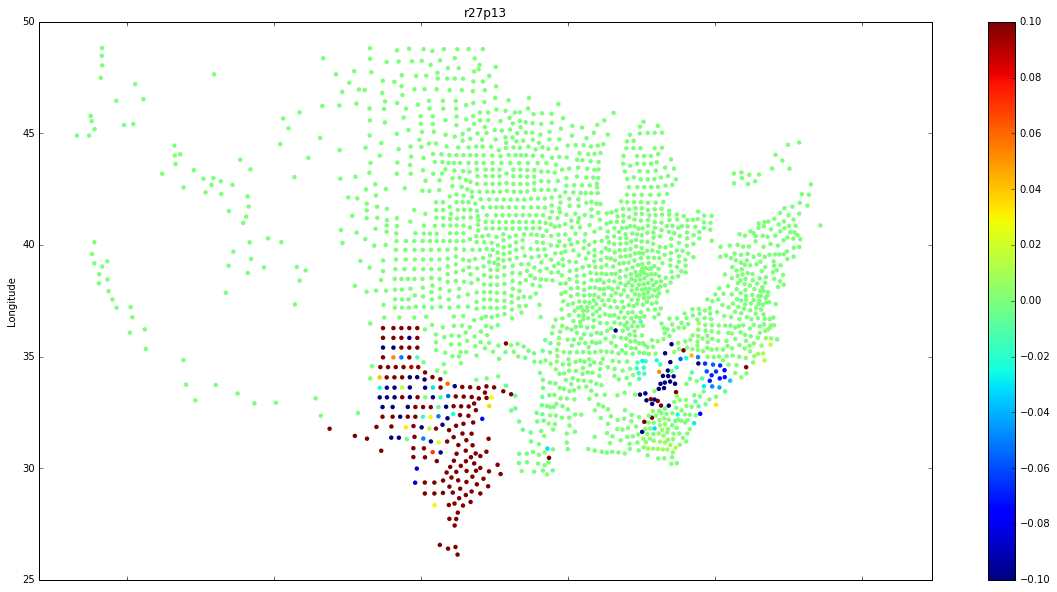

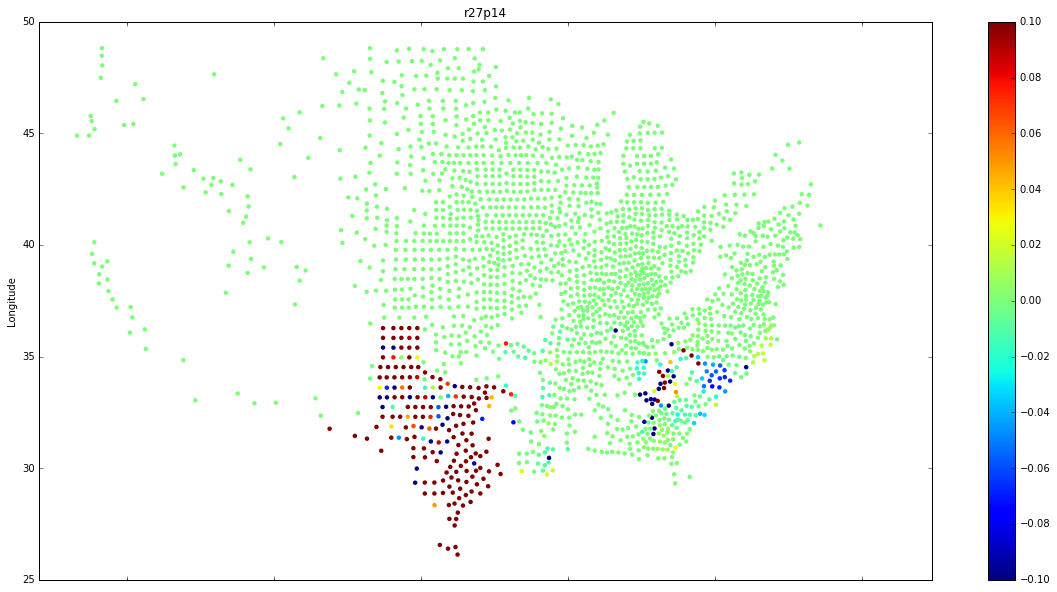

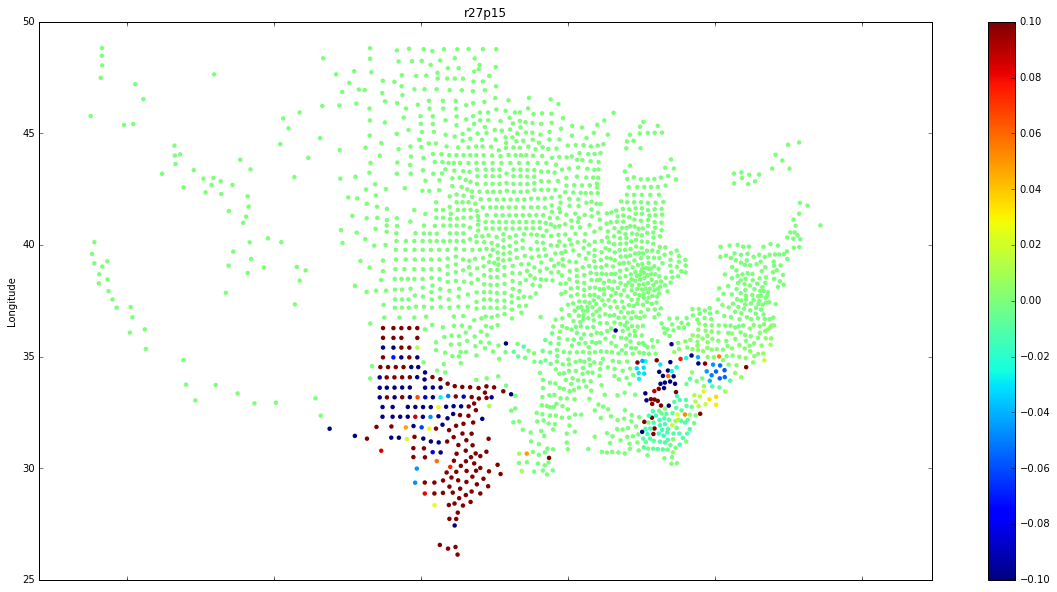

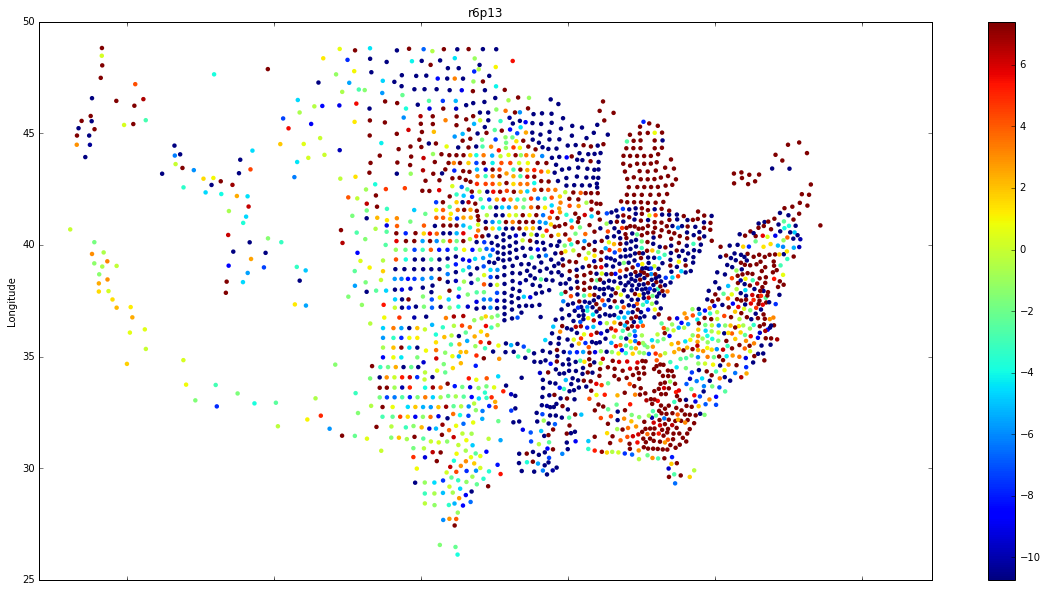

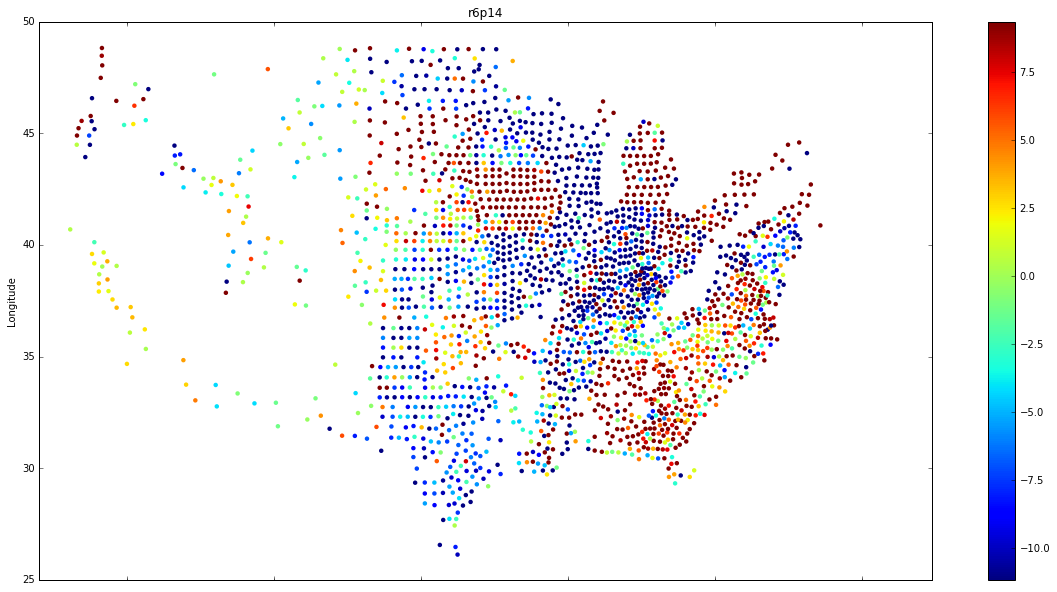

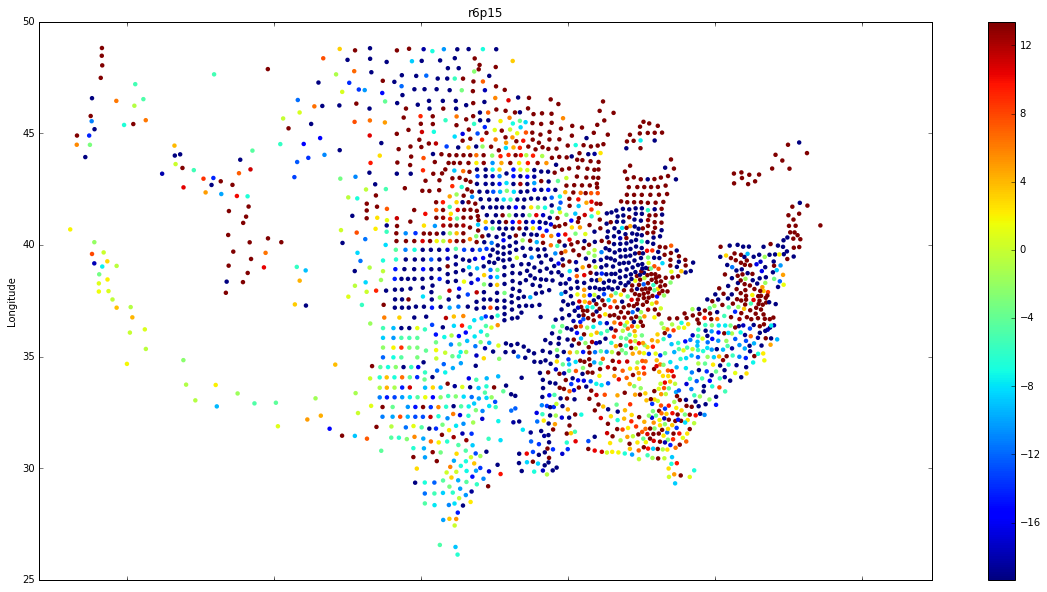

In [20]:
dirs = os.listdir(r"..\..\code\analysis_stage1\coefficients")
combined = pd.DataFrame()
combined = county_area*1
combined.rename(columns ={'GISJOIN':'countyID'},inplace = True)
combined.head()
for file in dirs:
    name = file.split('_')[-1].split('.')[0]
    coeff = pd.read_csv(r"..\..\code\analysis_stage1\coefficients\%s"%file)[['countyID','coeff']]
    coeff.rename(columns ={'coeff':'coeff%s'%name},inplace = True)
    combined = combined.merge(coeff,on='countyID')
    ax = combined.plot(x='X',y='Y',kind ='scatter',c = combined['coeff%s'%name],cmap = 'jet',vmin=combined['coeff%s'%name].quantile(0.25), vmax=combined['coeff%s'%name].quantile(0.75),figsize = (20,10),edgecolors ='None')
    ax.set_title(name)
    ax.set_xlim(-126,max(county_area['X']))
    ax.set_ylim(25,50)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    fig = ax.get_figure()
    fig.savefig(r'..\..\paper\figures\scatter_%s'%name,dpi=300,figsize=(126+max(county_area['X']),25))
#     ax2 = combined['coeff%s'%name].hist(figsize=(30,30),bins=100,log=True)
#     fig2 = ax2.get_figure()
#     fig2.savefig(r'..\..\paper\figures\hist_%s'%name,dpi=300,figsize=(10,30))

In [15]:
# name = pd.read_csv('../../code/analysis_stage1/namesCombinedOrder.txt',sep ='"',header =None)
# name_clean =name[[1,3,5,7,9]]
# name_clean.head()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [5]:
combined.describe().to_csv(r'..\..\paper\summary_stats_stage1.csv')